<a href="https://colab.research.google.com/github/freehtet/NLP/blob/main/TF_KERAS_IRIS_LYRIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing

In [10]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2024-11-04 02:11:59--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.207, 142.251.184.207, 108.177.121.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2024-11-04 02:11:59 (58.9 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [11]:
tokenizer = Tokenizer()

In [6]:
data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

In [12]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [14]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


In [15]:
#creating sequences per line
input_sequences[:10]

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361]]

In [16]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
#pre - 00001234

In [17]:
# create predictors and label / last word as label
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

In [23]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) #conver labels to onehot encoding

In [25]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) #interger encoding
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# model = Sequential()
# model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len - 1))
# model.add(Bidirectional(LSTM(150, return_sequences=True)))
# model.add(Dropout(0.2))  # Add dropout to prevent overfitting
# model.add(Bidirectional(LSTM(150)))
# model.add(Dense(150, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(total_words, activation='softmax'))

In [28]:
history = model.fit(xs, ys, epochs=100, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

Epoch 1/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.0894 - loss: 20.2525
Epoch 2/100
  2/377 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.1172 - loss: 18.5784

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


377/377 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.0894 - loss: 20.6883
Epoch 3/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 0.0953 - loss: 20.3159
Epoch 4/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 40s 77ms/step - accuracy: 0.1015 - loss: 19.3258
Epoch 5/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 40s 76ms/step - accuracy: 0.0902 - loss: 19.9565
Epoch 6/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.0907 - loss: 20.1733
Epoch 7/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.0987 - loss: 19.9041
Epoch 8/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.0961 - loss: 22.4156
Epoch 9/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.1020 - loss: 22.5307
Epoch 10/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.1089 - loss: 21.6715
Epoch 11/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.1038 - loss: 21.2421
Epoch 12/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 42s 77ms/step - accuracy: 0.1193 - loss: 21.4033
Epoch 13/100
377/37

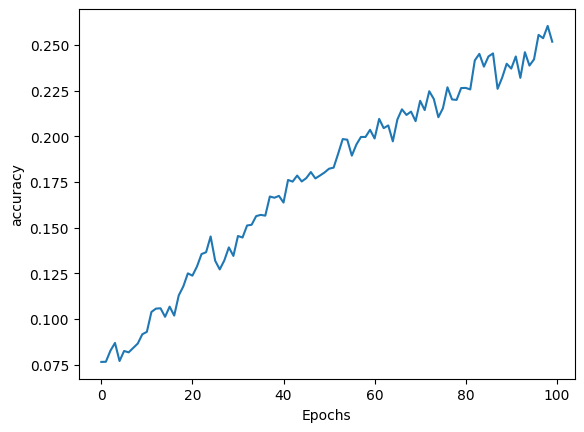

In [29]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [30]:
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━